## Step 1: Data Cleaning

##  1. Import Required Libraries

In [15]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##  2. Load the Excel File

In [17]:
df = pd.read_excel('ICRISAT-District Level Data.xlsx')
df.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


##  3. Inspect Dataset

In [18]:
# Basic structure
print("Shape:", df.shape)

# Column names
print("Columns:\n", df.columns.tolist())

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Check data types
print("Data types:\n", df.dtypes)


Shape: (16146, 80)
Columns:
 ['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name', 'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)', 'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)', 'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)', 'KHARIF SORGHUM AREA (1000 ha)', 'KHARIF SORGHUM PRODUCTION (1000 tons)', 'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)', 'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)', 'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)', 'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)', 'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)', 'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)', 'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)', 'FINGER MILLET PRODUCTION (1000 tons)', 'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)', 'BARLEY PRODUCTION (1000 tons)', 'BARLEY YIELD (Kg per ha)', 'CHICKPEA AREA (1000 ha)', 'CHICKPEA PRODUCTION (1000 tons)', 

##  4. Rename Columns for Clean Code Access


In [19]:
# Clean column names: lowercase, no spaces, remove brackets
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[\(\)]', '', regex=True)

##  5. Handle Missing Value

In [20]:
# Fill missing numeric values with 0
df.fillna(0, inplace=True)

##  6. Preview Cleaned Data

In [21]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dist_code                                  16146 non-null  int64  
 1   year                                       16146 non-null  int64  
 2   state_code                                 16146 non-null  int64  
 3   state_name                                 16146 non-null  object 
 4   dist_name                                  16146 non-null  object 
 5   rice_area_1000_ha                          16146 non-null  float64
 6   rice_production_1000_tons                  16146 non-null  float64
 7   rice_yield_kg_per_ha                       16146 non-null  float64
 8   wheat_area_1000_ha                         16146 non-null  float64
 9   wheat_production_1000_tons                 16146 non-null  float64
 10  wheat_yield_kg_per_ha 

,dist_code,year,state_code,rice_area_1000_ha,rice_production_1000_tons,rice_yield_kg_per_ha,wheat_area_1000_ha,wheat_production_1000_tons,wheat_yield_kg_per_ha,kharif_sorghum_area_1000_ha,...,sugarcane_yield_kg_per_ha,cotton_area_1000_ha,cotton_production_1000_tons,cotton_yield_kg_per_ha,fruits_area_1000_ha,vegetables_area_1000_ha,fruits_and_vegetables_area_1000_ha,potatoes_area_1000_ha,onion_area_1000_ha,fodder_area_1000_ha
count,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,...,16146.00000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000
mean,269.769231,1991.496841,9.568562,128.593192,224.889565,1486.924784,77.057946,182.012746,1492.419859,22.632268,...,4500.15306,28.018367,7.229225,124.644823,7.750478,11.086250,18.677877,3.177038,1.194604,21.550328
std,278.309125,15.011185,4.988538,160.078825,326.629828,956.185281,100.394479,348.834254,1081.255367,45.062714,...,3153.97042,74.239648,25.042132,207.681147,13.591135,18.003257,25.881842,8.029509,4.285067,60.062601
min,1.000000,1966.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,78.000000,1978.000000,6.000000,10.400000,9.460000,800.000000,1.770000,2.000000,750.000000,0.000000,...,2000.00000,0.000000,0.000000,0.000000,0.310000,1.600000,2.520000,0.000000,0.060000,0.000000
50%,156.000000,1991.000000,10.000000,66.800000,95.840000,1333.210000,36.800000,42.700000,1347.450000,2.050000,...,4502.21000,0.050000,0.000000,0.000000,2.220000,4.740000,8.945000,0.390000,0.280000,1.200000
75%,241.000000,2005.000000,12.000000,191.390000,315.715000,2113.517500,123.000000,215.192500,2131.580000,20.900000,...,6704.60500,10.097500,2.000000,202.270000,8.790000,12.510000,23.570000,3.150000,0.880000,16.762500
max,917.000000,2017.000000,20.000000,1154.230000,3215.010000,5653.830000,879.490000,4305.500000,5541.520000,334.800000,...,22062.30000,800.890000,376.610000,5000.000000,159.540000,200.060000,240.990000,111.610000,131.350000,1162.660000


In [22]:
df.to_csv('agriculture_data.csv', index=False)

##  Step 2: EDA (Exploratory Data Analysis)

In [23]:
# Set chart style
sns.set(style="whitegrid")

## Step 2.1: Top 7 Rice Producing States (Bar Plot)

C:\Users\Aswin prasath v\AppData\Local\Temp\ipykernel_2752\3080947777.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rice.values, y=top_rice.index, palette='Greens_r')


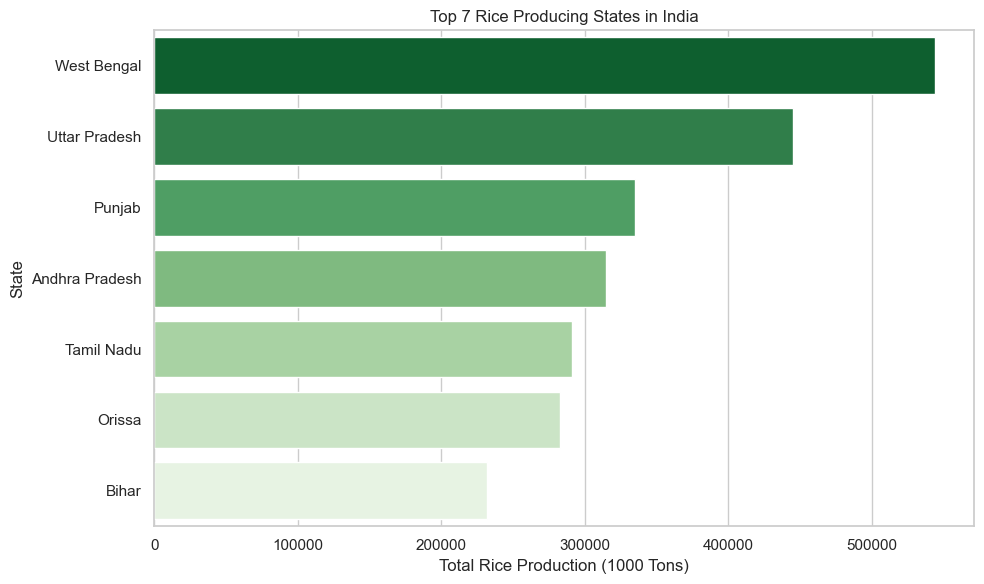

In [24]:
top_rice = df.groupby('state_name')['rice_production_1000_tons'].sum().sort_values(ascending=False).head(7)

plt.figure(figsize=(10,6))
sns.barplot(x=top_rice.values, y=top_rice.index, palette='Greens_r')
plt.title("Top 7 Rice Producing States in India")
plt.xlabel("Total Rice Production (1000 Tons)")
plt.ylabel("State")
plt.tight_layout()
plt.show()


## Step 2.2: Top 5 Wheat Producing States (Bar Chart)

C:\Users\Aswin prasath v\AppData\Local\Temp\ipykernel_2752\3568787365.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wheat.index, y=top_wheat.values, palette='Blues')


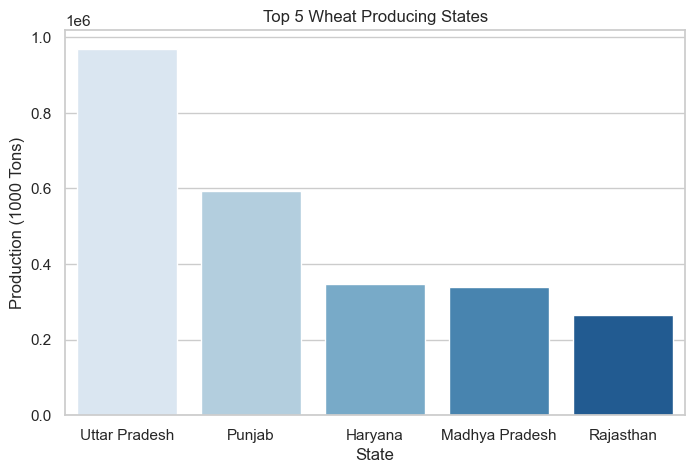

In [25]:
top_wheat = df.groupby('state_name')['wheat_production_1000_tons'].sum().sort_values(ascending=False).head(5)

# Bar Chart
plt.figure(figsize=(8,5))
sns.barplot(x=top_wheat.index, y=top_wheat.values, palette='Blues')
plt.title("Top 5 Wheat Producing States")
plt.ylabel("Production (1000 Tons)")
plt.xlabel("State")
plt.show()



## Step 2.3: Top 5 Wheat Producing States (Pie Chart)

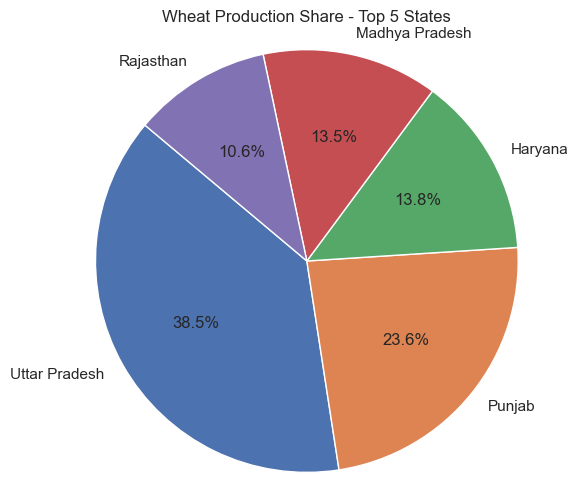

In [26]:
# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(top_wheat, labels=top_wheat.index, autopct='%1.1f%%', startangle=140)
plt.title("Wheat Production Share - Top 5 States")
plt.axis('equal')
plt.show()

 ## Step 2.4: Oilseed Production by Top 5 States

C:\Users\Aswin prasath v\AppData\Local\Temp\ipykernel_2752\2453936538.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_oilseed.values, y=top_oilseed.index, palette='YlOrBr')


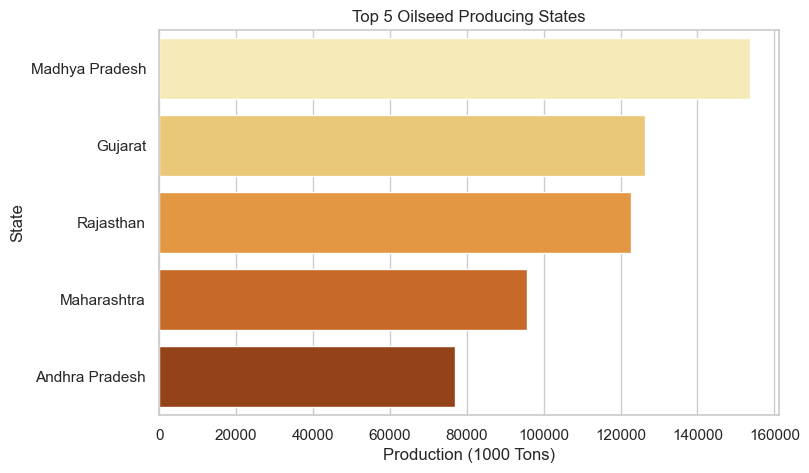

In [27]:
top_oilseed = df.groupby('state_name')['oilseeds_production_1000_tons'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_oilseed.values, y=top_oilseed.index, palette='YlOrBr')
plt.title("Top 5 Oilseed Producing States")
plt.xlabel("Production (1000 Tons)")
plt.ylabel("State")
plt.show()


##  Step 2.5: Sugarcane Production (Last 50 Years)

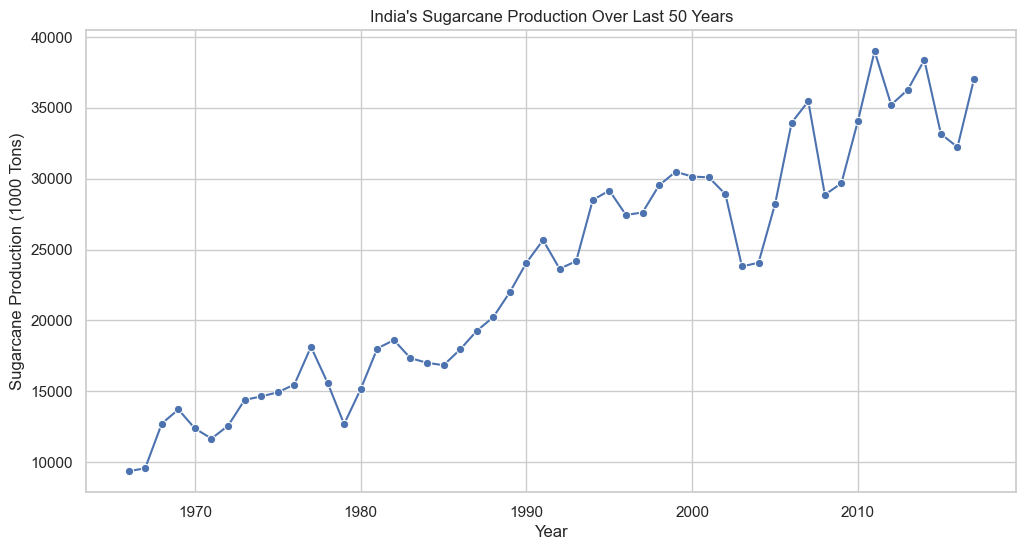

In [28]:
# Filter for years (last 50 years data might already be there)
sugarcane_trend = df.groupby('year')['sugarcane_production_1000_tons'].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=sugarcane_trend.index, y=sugarcane_trend.values, marker='o')
plt.title("India's Sugarcane Production Over Last 50 Years")
plt.xlabel("Year")
plt.ylabel("Sugarcane Production (1000 Tons)")
plt.grid(True)
plt.show()


## Step 2.6: Rice Production vs Wheat Production (Last 50 Years)

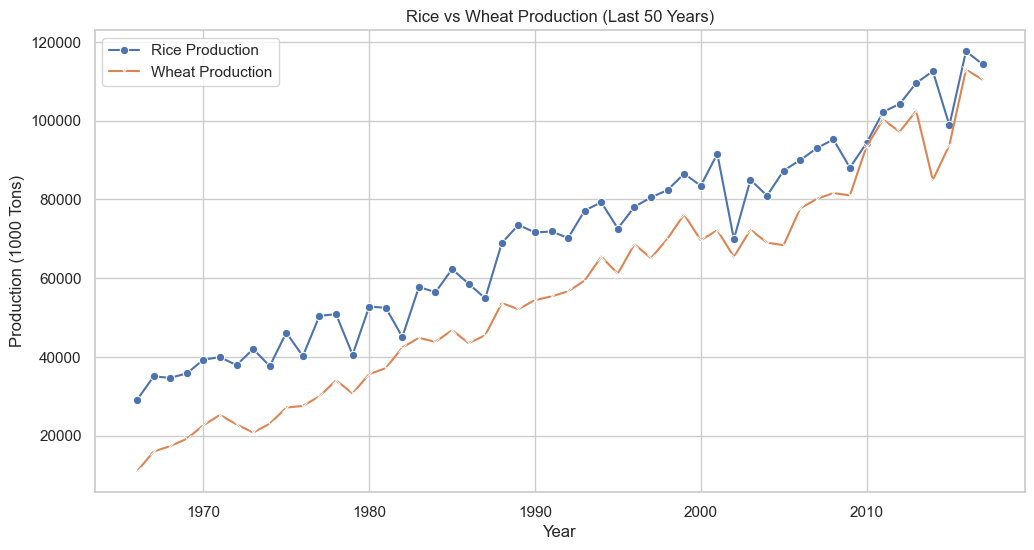

In [29]:
rice_trend = df.groupby('year')['rice_production_1000_tons'].sum()
wheat_trend = df.groupby('year')['wheat_production_1000_tons'].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=rice_trend.index, y=rice_trend.values, label='Rice Production', marker='o')
sns.lineplot(x=wheat_trend.index, y=wheat_trend.values, label='Wheat Production', marker='x')
plt.title("Rice vs Wheat Production (Last 50 Years)")
plt.xlabel("Year")
plt.ylabel("Production (1000 Tons)")
plt.legend()
plt.grid(True)
plt.show()


## Step 2.7: Rice Production in West Bengal Districts

C:\Users\Aswin prasath v\AppData\Local\Temp\ipykernel_2752\2173847695.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=west_bengal_districts.values, y=west_bengal_districts.index, palette='Greens')


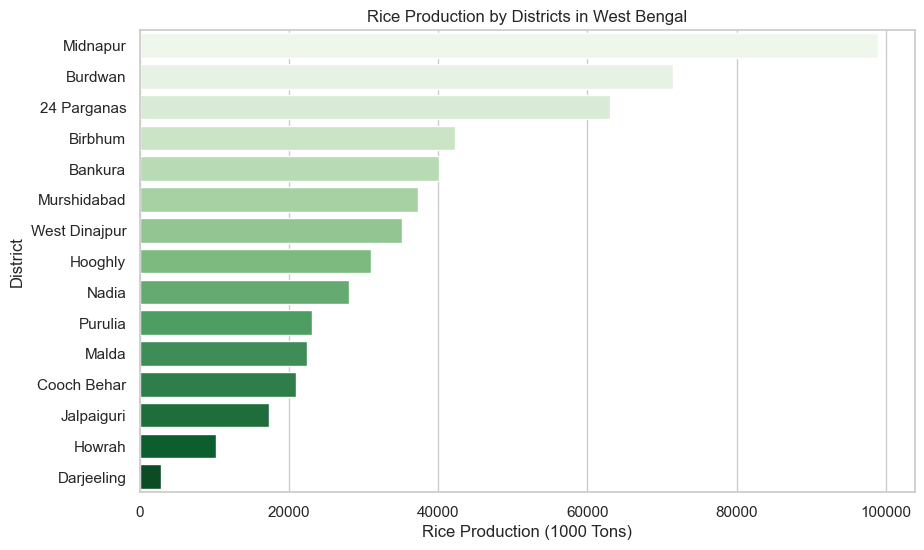

In [30]:
west_bengal_rice = df[df['state_name'].str.lower() == 'west bengal']
west_bengal_districts = west_bengal_rice.groupby('dist_name')['rice_production_1000_tons'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=west_bengal_districts.values, y=west_bengal_districts.index, palette='Greens')
plt.title("Rice Production by Districts in West Bengal")
plt.xlabel("Rice Production (1000 Tons)")
plt.ylabel("District")
plt.show()

## Step 3: Create SQL Database + Insert Cleaned Data

## Step 3: Load Cleaned Data into MySQL (Using SQLAlchemy + PyMySQL)

## Step 3.1: Install required libraries

In [31]:
pip install mysql-connector-python sqlalchemy

## Step 3.2: Setup Connection

In [32]:
import pandas as pd
from sqlalchemy import create_engine

host = 'localhost'
port = '3306'
database = 'agriculture'
username = 'root'
password = 'Rose143'

connection_string = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_string)

df.to_sql(name='agriculture', con=engine, index=False, if_exists='replace')



16146

## Step 2: Load Cleaned Data

In [33]:
# Load cleaned dataset
df = pd.read_csv('cleaned_agriculture_data.csv')
df.head()


,dist_code,year,state_code,state_name,dist_name,rice_area_1000_ha,rice_production_1000_tons,rice_yield_kg_per_ha,wheat_area_1000_ha,wheat_production_1000_tons,...,sugarcane_yield_kg_per_ha,cotton_area_1000_ha,cotton_production_1000_tons,cotton_yield_kg_per_ha,fruits_area_1000_ha,vegetables_area_1000_ha,fruits_and_vegetables_area_1000_ha,potatoes_area_1000_ha,onion_area_1000_ha,fodder_area_1000_ha
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


## Step 3: Insert into MySQL Table

In [1]:
# Push dataframe into MySQL table
df.to_sql(name='agriculture_data', con=engine, index=False, if_exists='replace')

print(" Data inserted successfully into agriculture_data table!")


NameError: name 'df' is not defined

## THE QUERIES ARE ....

-- 1. Year-wise Trend of Rice Production Across States (Top 3 each year)

SELECT year, state_name, rice_production_1000_tons
FROM ( SELECT year, state_name, rice_production_1000_tons,
        ROW_NUMBER() OVER (PARTITION BY year ORDER BY rice_production_1000_tons DESC) AS rank1
    FROM agriculture_data
) AS ranked_data
WHERE rank1 <= 3
ORDER BY year, rank1;

-- 2. Top 5 Districts by Wheat Yield Increase Over the Last 5 Years


SELECT dist_name,
       MAX(wheat_yield_kg_per_ha) - MIN(wheat_yield_kg_per_ha) AS yield_increase
FROM (
    SELECT *,
           ROW_NUMBER() OVER (PARTITION BY dist_name ORDER BY year DESC) AS rank2
    FROM agriculture_data
) AS sub
WHERE rank2 <= 5
GROUP BY dist_name
ORDER BY yield_increase DESC
LIMIT 5;

-- 3. States with Highest Growth in Oilseed Production (5-Year Growth Rate)

-- Step 1: Retrieve initial and final production values for each state over the last 5 years


WITH GrowthData AS (
    SELECT 
        state_name,
        year,
        SUM(oilseeds_production_1000_tons) AS production
    FROM agriculture_data
    WHERE year BETWEEN (SELECT MAX(year) - 4 FROM agriculture_data) AND (SELECT MAX(year) FROM agriculture_data)
    GROUP BY state_name, year
)
-- Step 2: Calculate growth rate for each state and show yearly results


SELECT 
    gd.year,
    gd.state_name, 
    (gd.production - LAG(gd.production) OVER (PARTITION BY gd.state_name ORDER BY gd.year)) / LAG(gd.production) OVER (PARTITION BY gd.state_name ORDER BY gd.year) * 100 AS growth_rate
FROM GrowthData gd
ORDER BY gd.state_name, gd.year;

-- 4. District-wise Correlation Between Area and Production (Rice, Wheat, Maize)


SELECT 
    dist_name,
    SUM(rice_area_1000_ha) AS rice_area,
    SUM(rice_production_1000_tons) AS rice_production,
    SUM(wheat_area_1000_ha) AS wheat_area,
    SUM(wheat_production_1000_tons) AS wheat_production,
    SUM(maize_area_1000_ha) AS maize_area,
    SUM(maize_production_1000_tons) AS maize_production
FROM agriculture_data
GROUP BY dist_name
ORDER BY dist_name;

-- 5.Yearly Production Growth of Cotton in Top 5 Cotton Producing States


WITH top_cotton_states AS (
    SELECT state_name
    FROM agriculture_data
    GROUP BY state_name
    ORDER BY SUM(COTTON_PRODUCTION_1000_tons) DESC   -- note the back-ticks
    LIMIT 5
)
SELECT a.year, a.state_name, SUM(a.COTTON_PRODUCTION_1000_tons) AS yearly_cotton_production
FROM agriculture_data AS a
JOIN top_cotton_states AS t
  ON a.state_name = t.state_name
GROUP BY a.year, a.state_name
ORDER BY a.state_name, a.year;

-- 6.Districts with the Highest Groundnut Production in 2020

SELECT dist_name, state_name, groundnut_production_1000_tons AS groundnut_production
FROM agriculture_data
WHERE year = 2020
ORDER BY groundnut_production_1000_tons asc
LIMIT 10;

-- 7.Annual Average Maize Yield Across All States

SELECT state_name, Year,avg(maize_production_1000_tons) as maize_Avg_yield
FROM agriculture_data
group BY Year,state_name
order by state_name asc;

-- 8.Total Area Cultivated for Oilseeds in Each State--

Select state_name, sum(oilseeds_area_1000_ha) as area_cultivated
FROM agriculture_data
group by state_name
order by state_name asc;

-- 9.Districts with the Highest Rice Yield


Select dist_name, sum(rice_yield_kg_per_ha) as Rice_Yield
FROM agriculture_data
group by dist_name
order by Rice_Yield desc;

-- 10.Compare the Production of Wheat and Rice for the Top 5 States Over 10 Years

SELECT 
    a.year,
    a.state_name,
    SUM(a.wheat_production_1000_tons) AS wheat_production,
    SUM(a.rice_production_1000_tons) AS rice_production
FROM agriculture_data a
JOIN top_5_states t ON a.state_name = t.state_name
WHERE a.year BETWEEN 2011 AND 2020
GROUP BY a.year, a.state_name
ORDER BY a.state_name, a.year;
